<a href="https://colab.research.google.com/github/zynaib/g2/blob/main/feature__engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:

# Feature Engineering

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset directly from GitHub (replace the link with your repo link)
url = "https://raw.githubusercontent.com/ta7er-Alalfi/T7-/refs/heads/main/house-prices-advanced-regression-techniques/train.csv"
df = pd.read_csv(url)



In [4]:

# =========================
# Feature Engineering
# =========================

df["HouseAge"] = df["YrSold"] - df["YearBuilt"]
df["RemodAge"] = df["YrSold"] - df["YearRemodAdd"]
df["TotalSqFt"] = df["1stFlrSF"] + df["2ndFlrSF"] + df["TotalBsmtSF"]
df["TotalBaths"] = df["FullBath"] + df["HalfBath"] + df["BsmtFullBath"] + df["BsmtHalfBath"]
df["TotalPorchSF"] = df["OpenPorchSF"] + df["EnclosedPorch"] + df["3SsnPorch"] + df["ScreenPorch"]

print(df[["HouseAge","RemodAge","TotalSqFt","TotalBaths","TotalPorchSF"]].head())


   HouseAge  RemodAge  TotalSqFt  TotalBaths  TotalPorchSF
0         5         5       2566           4            61
1        31        31       2524           3             0
2         7         6       2706           4            42
3        91        36       2473           2           307
4         8         8       3343           4            84


In [5]:

# =========================
# Correlation Analysis
# =========================
# Keep only numeric columns

num_df = df.select_dtypes(include=[np.number])

# Correlation with SalePrice
corr = num_df.corr()["SalePrice"].sort_values(ascending=False)
print("Top correlations with SalePrice:\n", corr.head(15))
print("\nLowest correlations with SalePrice:\n", corr.tail(15))

Top correlations with SalePrice:
 SalePrice       1.000000
OverallQual     0.790982
TotalSqFt       0.782260
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
TotalBaths      0.613005
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Name: SalePrice, dtype: float64

Lowest correlations with SalePrice:
 PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
RemodAge        -0.509079
HouseAge        -0.523350
Name: SalePrice, dtype: float64


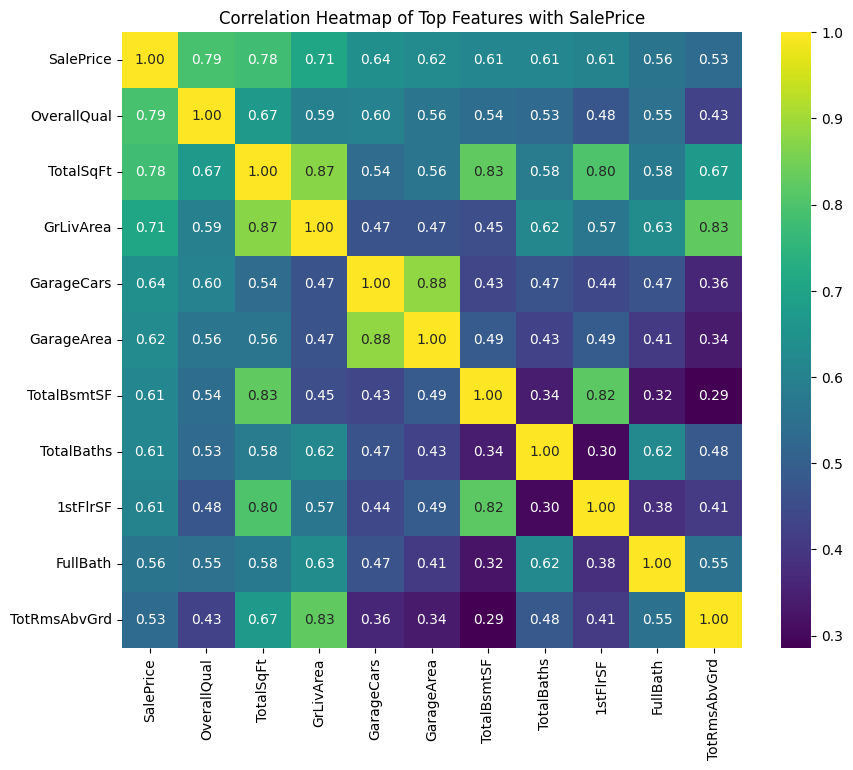

In [6]:

# Heatmap of top correlations

# Select top correlated features for heatmap
top_features = corr.head(11).index
# Plot heatmap of correlations
plt.figure(figsize=(10,8))
sns.heatmap(num_df[top_features].corr(), annot=True, cmap="viridis", fmt=".2f")
plt.title("Correlation Heatmap of Top Features with SalePrice")
plt.show()

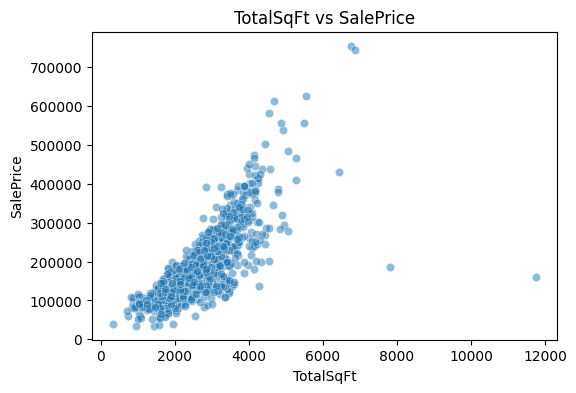

In [16]:

# =========================
# Visualizations
# =========================


# Create engineered feature if not exists
if "TotalSqFt" not in df.columns:
    df["TotalSqFt"] = df["1stFlrSF"] + df["2ndFlrSF"] + df["TotalBsmtSF"]

# Ensure numeric types for plotting
df["TotalSqFt"] = pd.to_numeric(df["TotalSqFt"], errors="coerce")
df["SalePrice"] = pd.to_numeric(df["SalePrice"], errors="coerce")

# Drop missing values for a clean plot
tmp = df[["TotalSqFt", "SalePrice"]].dropna()

# Scatter plot to show relationship
plt.figure(figsize=(6,4))
sns.scatterplot(data=tmp, x="TotalSqFt", y="SalePrice", alpha=0.5)
plt.title("TotalSqFt vs SalePrice")
plt.show()

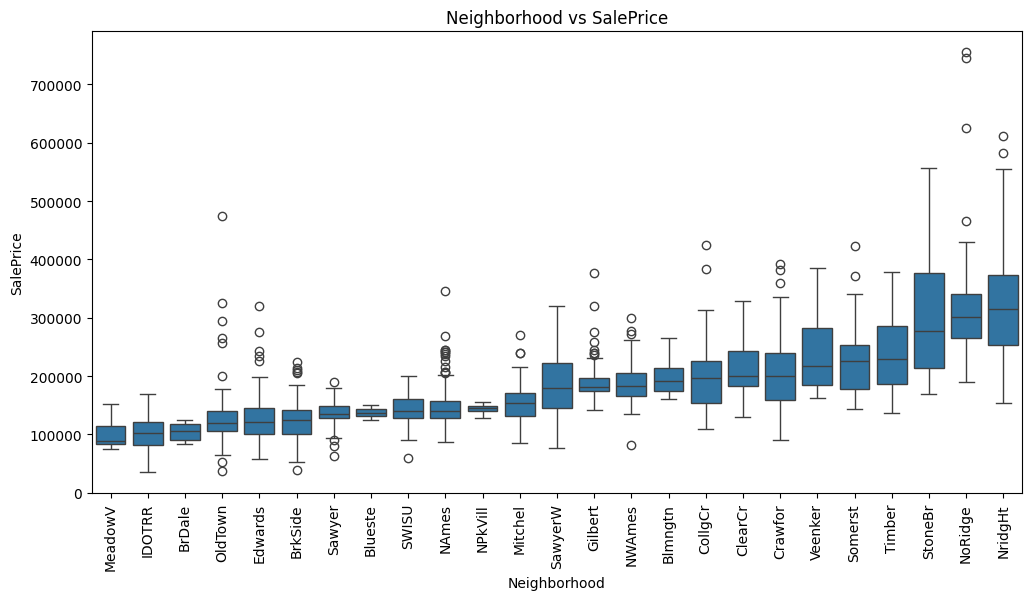

In [9]:
# Boxplot: SalePrice distribution across different Neighborhoods
# This helps to visualize how house prices vary depending on location,
# showing both median values and spread (including outliers).
plt.figure(figsize=(12,6))
order = df.groupby("Neighborhood")["SalePrice"].median().sort_values().index
sns.boxplot(x="Neighborhood", y="SalePrice", data=df, order=order)
plt.xticks(rotation=90)
plt.title("Neighborhood vs SalePrice")
plt.show()

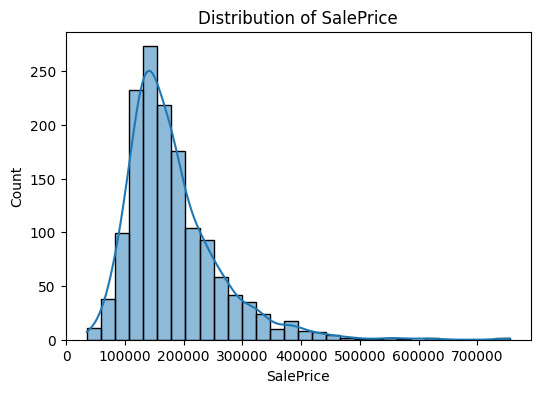

In [20]:
# Distribution of SalePrice (target variable)
plt.figure(figsize=(6,4))
sns.histplot(df["SalePrice"], bins=30, kde=True)
plt.title("Distribution of SalePrice")
plt.show()

In [22]:
# Check missing values in engineered features

# Make sure engineered features exist
if "HouseAge" not in df.columns:
    df["HouseAge"] = df["YrSold"] - df["YearBuilt"]

if "RemodAge" not in df.columns:
    df["RemodAge"] = df["YrSold"] - df["YearRemodAdd"]

if "TotalSqFt" not in df.columns:
    df["TotalSqFt"] = df["1stFlrSF"] + df["2ndFlrSF"] + df["TotalBsmtSF"]

if "TotalBaths" not in df.columns:
    df["TotalBaths"] = df["FullBath"] + df["HalfBath"] + df["BsmtFullBath"] + df["BsmtHalfBath"]

if "TotalPorchSF" not in df.columns:
    df["TotalPorchSF"] = df["OpenPorchSF"] + df["EnclosedPorch"] + df["3SsnPorch"] + df["ScreenPorch"]

# List of engineered features
features = ["HouseAge","RemodAge","TotalSqFt","TotalBaths","TotalPorchSF"]

# Check missing values only for available features
present = [c for c in features if c in df.columns]
missing_counts = df[present].isna().sum().rename("Missing values")

print(missing_counts)

# Optional: show in a clean table
import pandas as pd
pd.DataFrame({"Feature": present, "Missing": df[present].isna().sum().values})

HouseAge        0
RemodAge        0
TotalSqFt       0
TotalBaths      0
TotalPorchSF    0
Name: Missing values, dtype: int64


,Feature,Missing
0,HouseAge,0
1,RemodAge,0
2,TotalSqFt,0
3,TotalBaths,0
4,TotalPorchSF,0


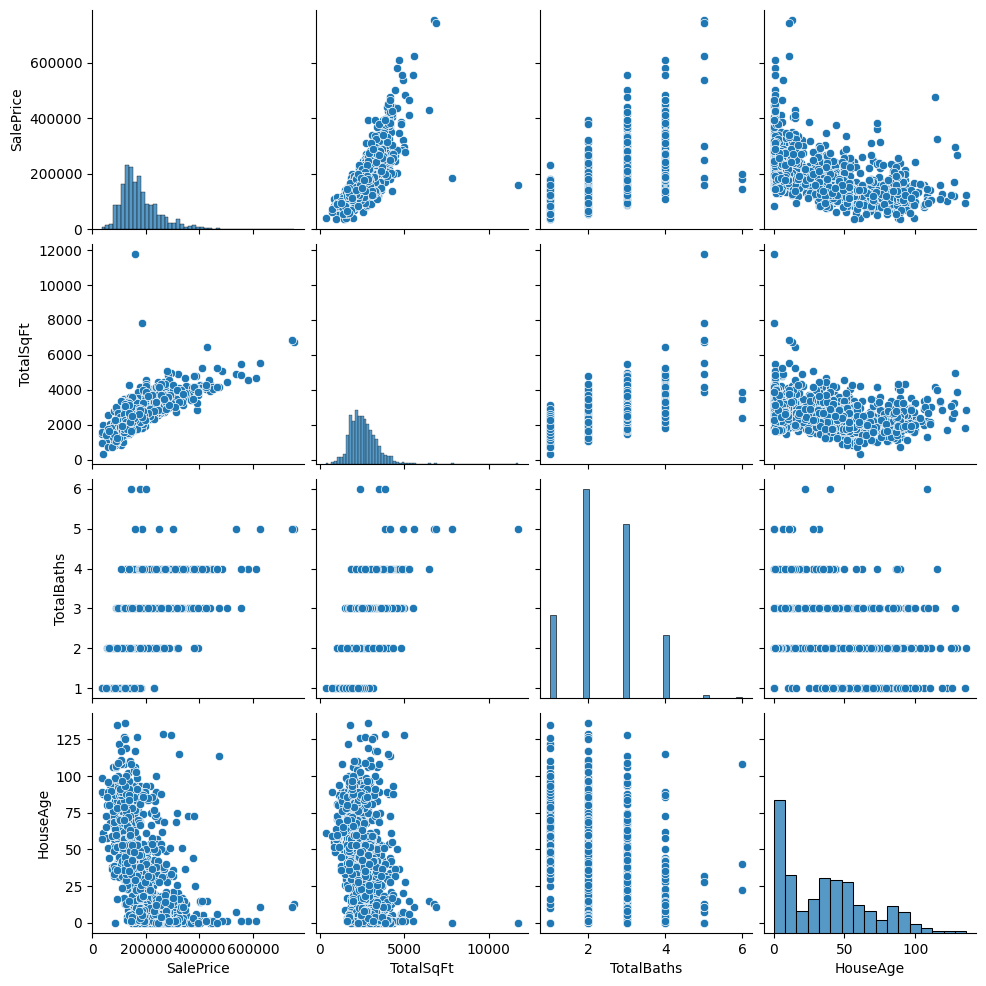

In [10]:
# =========================
# Visualizations
# =========================
# Pairplot: visualize pairwise relationships between key features and SalePrice
# Ensures numeric types and removes missing values before plotting.

# Make sure engineered features exist
if "HouseAge" not in df.columns:
    df["HouseAge"] = df["YrSold"] - df["YearBuilt"]
if "RemodAge" not in df.columns:
    df["RemodAge"] = df["YrSold"] - df["YearRemodAdd"]
if "TotalSqFt" not in df.columns:
    df["TotalSqFt"] = df["1stFlrSF"] + df["2ndFlrSF"] + df["TotalBsmtSF"]
if "TotalBaths" not in df.columns:
    df["TotalBaths"] = df["FullBath"] + df["HalfBath"] + df["BsmtFullBath"] + df["BsmtHalfBath"]
if "TotalPorchSF" not in df.columns:
    df["TotalPorchSF"] = df["OpenPorchSF"] + df["EnclosedPorch"] + df["3SsnPorch"] + df["ScreenPorch"]

# Ensure numeric types
cols = ["SalePrice","TotalSqFt","TotalBaths","HouseAge"]
df[cols] = df[cols].apply(pd.to_numeric, errors="coerce")

# Drop rows with missing values in these columns
tmp = df[cols].dropna()

# Plot pairplot
sns.pairplot(tmp, vars=cols)
plt.show()


In [ ]:



# =========================
# Observations
# =========================
# - TotalSqFt has a strong positive correlation with SalePrice.
# - HouseAge shows a weak negative correlation.
# - Neighborhood is an important categorical variable with clear differences in median prices.